<a href="https://colab.research.google.com/github/ClaireZixiWang/robustness-interpretability/blob/main/MNIST_natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
import requests
from PIL import Image
from io import BytesIO

import copy

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("No Cuda Available")
device

device(type='cuda', index=0)

In [ ]:
# network parameters
BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 0.01

In [ ]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)
test_data = torchvision.datasets.MNIST('mnist_data', train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size = BATCH_SIZE)
test_dl = torch.utils.data.DataLoader(val_data, batch_size = BATCH_SIZE)

In [ ]:
# class LeNet(nn.Module):
#     def __init__(self):
#         super(LeNet, self).__init__()
#         self.conv1 = nn.Conv2d(1, 6, 5, padding=2),
#         self.act1 = nn.ReLU(),
#         self.avp1 = nn.AvgPool2d(2, stride=2),
#         self.cov2 = nn.Conv2d(6, 16, 5, padding=0),
#         self.act2 = nn.ReLU(),
#         self.avp2 = nn.AvgPool2d(2, stride=2),
#         self.flatten = nn.Flatten(),
#         self.f1 = nn.Linear(400, 120),
#         self.act3 = nn.ReLU(),
#         self.f2 = nn.Linear(120, 84),
#         self.act4 = nn.ReLU(),

#         self.fc = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.act1(x)
#         x = self.avp1(x) 
#         x = self.cov2(x)
#         x = self.act2(x)
#         x = self.avp2(x)
#         x = self.flatten(x)
#         x = self.f1(x)
#         x = self.act3(x)
#         x = self.f2(x)
#         x = self.act4(x)
#         x = self.fc(x)

#         return x
    
#     def return_first_layer(self, x):
#         x = self.conv1(x)
#         return x

In [ ]:
def create_lenet():
    model = nn.Sequential(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )
    return model

In [ ]:
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return correct*100./total


In [ ]:
def train(numb_epoch=3, lr=1e-3, device="cpu"):
    accuracies = []
    cnn = create_lenet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    for epoch in range(numb_epoch):
        for i, (images, labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        # accuracy = float(validate(cnn, val_dl))
        # accuracies.append(accuracy)
        # if accuracy > max_accuracy:
        #     best_model = copy.deepcopy(cnn)
        #     max_accuracy = accuracy
        #     print("Saving Best Model with Accuracy: ", accuracy)
        print('Epoch:', epoch+1, "Accuracy :", accuracy, '%')
    plt.plot(accuracies)
    return best_model

Saving Best Model with Accuracy:  95.5199966430664
Epoch: 1 Accuracy : 95.5199966430664 %
Saving Best Model with Accuracy:  96.94999694824219
Epoch: 2 Accuracy : 96.94999694824219 %
Saving Best Model with Accuracy:  97.58999633789062
Epoch: 3 Accuracy : 97.58999633789062 %
Saving Best Model with Accuracy:  98.29000091552734
Epoch: 4 Accuracy : 98.29000091552734 %
Saving Best Model with Accuracy:  98.5199966430664
Epoch: 5 Accuracy : 98.5199966430664 %
Epoch: 6 Accuracy : 98.44999694824219 %
Saving Best Model with Accuracy:  98.56999969482422
Epoch: 7 Accuracy : 98.56999969482422 %
Epoch: 8 Accuracy : 98.38999938964844 %
Epoch: 9 Accuracy : 98.37000274658203 %
Saving Best Model with Accuracy:  98.58000183105469
Epoch: 10 Accuracy : 98.58000183105469 %
Epoch: 11 Accuracy : 98.5199966430664 %
Saving Best Model with Accuracy:  98.69999694824219
Epoch: 12 Accuracy : 98.69999694824219 %
Saving Best Model with Accuracy:  98.83000183105469
Epoch: 13 Accuracy : 98.83000183105469 %
Saving Best M

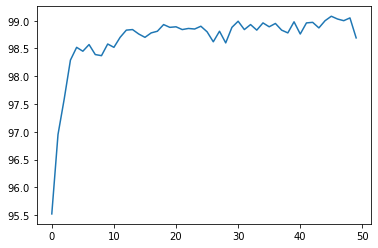

In [ ]:
lenet = train(50, device=device)

In [ ]:
torch.save(lenet.state_dict(), "/content/drive/MyDrive/LeNet/lenet-non-val.pth")

## Silency maps of the LeNet Model

In [ ]:
map_data_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=1, 
                                          shuffle=False)

(1, 1, 28, 28)


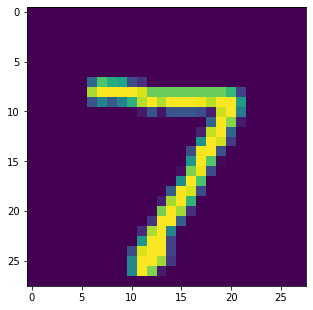

In [ ]:
image, labels = iter(map_data_loader).next()
npimg = image.numpy()
print(npimg.shape)
fig = plt.figure(figsize = (5, 15))
plt.imshow(npimg.reshape(28,28))
# plt.title('title')
plt.show()

In [ ]:
# Set the device for the image
image = image.to(device)
# Set the requires_grad_ to the image for retrieving gradients
image.requires_grad_()


tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
# Retrieve output from the image
output = lenet(image)

# Catch the output
output_idx = output.argmax()
output_max = output[0, output_idx]

# Do backpropagation to get the derivative of the output based on the image
output_max.backward()

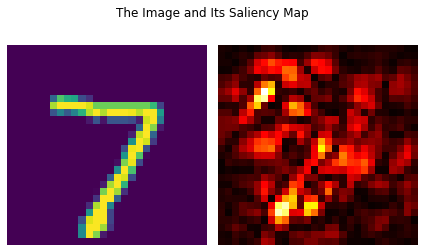

In [ ]:
# Retireve the saliency map and also pick the maximum value from channels on each pixel.
# In this case, we look at dim=1. Recall the shape (batch_size, channel, width, height)
saliency, _ = torch.max(image.grad.data.abs(), dim=1) 
# saliency = saliency.reshape(32, 32)

# Reshape the image
# image = image.reshape(-1, 32, 32)

# Visualize the image and the saliency map
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image.cpu().detach().numpy().reshape(28,28))
ax[0].axis('off')
ax[1].imshow(saliency.cpu().reshape(28,28), cmap='hot')
ax[1].axis('off')
plt.tight_layout()
fig.suptitle('The Image and Its Saliency Map')
plt.show()